## CHAPTER 1 
### PREDICTING STUDENT GRANT RECOMMENDATIONS
#### As part of the book in question is an exercise to demonstrate the parts involved in creating a simple ML model from a base of student grades to predict the chance that a student will get a recommendation for a research project.

##### *Jose Ruben Garcia Garcia*
##### *Frebuary 2024*
##### *Reference: Practical Machine learning python problems solver*

### Data retrieval

In [1]:
#importing libraries
import pandas as pd

In [5]:
df = pd.read_csv('MLB_CH1/student_records.csv')
df.head()

,Name,OverallGrade,Obedient,ResearchScore,ProjectScore,Recommend
0,Henry,A,Y,90,85,Yes
1,John,C,N,85,51,Yes
2,David,F,N,10,17,No
3,Holmes,B,Y,75,71,No
4,Marvin,E,N,20,30,No


In [9]:
df.columns

Index(['Name', 'OverallGrade', 'Obedient', 'ResearchScore', 'ProjectScore',
       'Recommend'],
      dtype='object')

### Data kwnoledge

#### We have historical student performance data and their grant recommendation outcomes in the form of a comma separated value file named student_records.csv. Each data sample consists of the following attributes.
#### • Name (the student name)
#### • OverallGrade (overall grade obtained)
#### • Obedient (whether they were diligent during their course of stay)
#### • ResearchScore (marks obtained in their research work)
#### • ProjectScore (marks obtained in the project)
#### • Recommend (whether they got the grant recommendation)
#### The main objective is to build a predictive model based on this data such that you can predict for any future student whether they will be recommended for the grant based on their performance attributes.

### Data preparation

#### Feature extraction and engineering

In [15]:
# Get features and proper outcomes
features_names = ['OverallGrade', 'Obedient', 'ResearchScore', 'ProjectScore']
training_features = df[features_names]
outcome_name = ['Recommend']
outcome_labels = df[outcome_name]

In [16]:
#Features of the dataset for X
training_features

,OverallGrade,Obedient,ResearchScore,ProjectScore
0,A,Y,90,85
1,C,N,85,51
2,F,N,10,17
3,B,Y,75,71
4,E,N,20,30
5,A,Y,92,79
6,B,Y,60,59
7,C,Y,75,33


In [18]:
#Features of the dataset for y
outcome_labels

,Recommend
0,Yes
1,Yes
2,No
3,No
4,No
5,Yes
6,No
7,No


In [20]:
#For this step we'll classify our columns into the proper type of data such a numerical and categorical
numeric_feature_names = ['ResearchScore','ProjectScore']
categorical_feature_names = ['OverallGrade','Obedient']

In [22]:
# Normalizing / standarize data using scikit - learn module based on atributes 
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

# fit scaler on numeric features
ss.fit(training_features[numeric_feature_names])

# Scaling numeric features
training_features[numeric_feature_names] = ss.transform(training_features[numeric_feature_names])

#show the updated features
training_features

/var/folders/p9/kd2njf997_7bs4hbnrvzl6yc0000gp/T/ipykernel_16318/1114856650.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  training_features[numeric_feature_names] = ss.transform(training_features[numeric_feature_names])


,OverallGrade,Obedient,ResearchScore,ProjectScore
0,A,Y,0.899583,1.376650
1,C,N,0.730648,-0.091777
2,F,N,-1.803390,-1.560203
3,B,Y,0.392776,0.772004
4,E,N,-1.465519,-0.998746
5,A,Y,0.967158,1.117516
6,B,Y,-0.114032,0.253735
7,C,Y,0.392776,-0.869179


In [23]:
# handling categorical features 
training_features = pd.get_dummies(training_features,columns=categorical_feature_names)

#view newly engineering features
training_features

,ResearchScore,ProjectScore,OverallGrade_A,OverallGrade_B,OverallGrade_C,OverallGrade_E,OverallGrade_F,Obedient_N,Obedient_Y
0,0.899583,1.376650,True,False,False,False,False,False,True
1,0.730648,-0.091777,False,False,True,False,False,True,False
2,-1.803390,-1.560203,False,False,False,False,True,True,False
3,0.392776,0.772004,False,True,False,False,False,False,True
4,-1.465519,-0.998746,False,False,False,True,False,True,False
5,0.967158,1.117516,True,False,False,False,False,False,True
6,-0.114032,0.253735,False,True,False,False,False,False,True
7,0.392776,-0.869179,False,False,True,False,False,False,True


In [26]:
#Get the list of new categorical features
categorical_engineered_features = list(set(training_features.columns) - set(numeric_feature_names))
categorical_engineered_features

['OverallGrade_E',
 'OverallGrade_C',
 'OverallGrade_A',
 'Obedient_Y',
 'OverallGrade_B',
 'Obedient_N',
 'OverallGrade_F']

### Modeling
#### For this approach we will use a simple classifiaciont (supervised) model based on the feature set by uisng the logistic regression algorithm

In [28]:
from sklearn.linear_model import LogisticRegression
import numpy as np

#fit the model
lr = LogisticRegression()
model = lr.fit(training_features,
              np.array(outcome_labels['Recommend']))

#Model Parameters
model

LogisticRegression()

### Model evaluation


In [29]:
#Simple evaluation on training data
pred_labels = model.predict(training_features)
actual_labels = np.array(outcome_labels['Recommend'])

#Evaluate model performance
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

print('Accuracy', float(accuracy_score(actual_labels,pred_labels))*100, '%')
print('Classification Stats:')
print(classification_report(actual_labels, pred_labels))

Accuracy 100.0 %
Classification Stats:
              precision    recall  f1-score   support

          No       1.00      1.00      1.00         5
         Yes       1.00      1.00      1.00         3

    accuracy                           1.00         8
   macro avg       1.00      1.00      1.00         8
weighted avg       1.00      1.00      1.00         8



### Model deployment 

In [35]:
# In order to deploy this model we need to persist the model, we also need to save the scalar object we used to scale the numerical features
import joblib
import os

# Saving models to deploy in the server
if not os.path.exists('Model'):
    os.mkdir('Model')
if not os.path.exists('Scaler'):
    os.mkdir('Scaler')

joblib.dump(model, r'Model/model.pickle')
joblib.dump(ss, r'Scaler/scaler.pickle')


['Scaler/scaler.pickle']

### Model deployment 

In [36]:
#load model and scaler object
model = joblib.load(r'Model/model.pickle')
scaler = joblib.load(r'Scaler/scaler.pickle')

In [37]:
#data retrieval (creating 2 new students)
new_data = pd.DataFrame([{'Name': 'Nathan', 'OverallGrade': 'F',
                          'Obedient': 'N', 'ResearchScore': 30, 'ProjectScore': 20},
                          {'Name': 'Thomas', 'OverallGrade': 'A','Obedient': 'Y', 
                           'ResearchScore': 78, 'ProjectScore': 80}])

new_data = new_data[['Name','OverallGrade','Obedient','ResearchScore','ProjectScore']]
new_data

,Name,OverallGrade,Obedient,ResearchScore,ProjectScore
0,Nathan,F,N,30,20
1,Thomas,A,Y,78,80


In [42]:
## data preparation
prediction_features = new_data[features_names]

# scaling
prediction_features[numeric_feature_names] = scaler.transform(prediction_features[numeric_feature_names])

# engineering categorical variables
prediction_features = pd.get_dummies(prediction_features,
columns=categorical_feature_names)

# view feature set
prediction_features

/var/folders/p9/kd2njf997_7bs4hbnrvzl6yc0000gp/T/ipykernel_16318/3799237296.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prediction_features[numeric_feature_names] = scaler.transform(prediction_features[numeric_feature_names])


,ResearchScore,ProjectScore,OverallGrade_A,OverallGrade_F,Obedient_N,Obedient_Y
0,-1.127647,-1.430636,False,True,True,False
1,0.494137,1.160705,True,False,False,True


In [60]:
#add a missing categorical feature columns
current_categorical_engineered_features = set(prediction_features.columns) - set(numeric_feature_names)
missing_features = set(categorical_engineered_features) - current_categorical_engineered_features

for feature in missing_features:
    #add zeros since feature is absent in these data samples
    prediction_features[feature] = 0 * len(prediction_features)

prediction_features

prediction_features = prediction_features[['ResearchScore', 'ProjectScore', 'OverallGrade_A', 'OverallGrade_B', 
                                           'OverallGrade_C','OverallGrade_E', 'OverallGrade_F', 
                                           'Obedient_N', 'Obedient_Y']]

# Mostrar DataFrame con las columnas reorganizadas
prediction_features

,ResearchScore,ProjectScore,OverallGrade_A,OverallGrade_B,OverallGrade_C,OverallGrade_E,OverallGrade_F,Obedient_N,Obedient_Y
0,-1.127647,-1.430636,False,0,0,0,True,True,False
1,0.494137,1.160705,True,0,0,0,False,False,True


In [61]:
#Once we have the complete feature set the model can be tested and get the predictions
## predict using the model
predictions = model.predict(prediction_features)

#display results
new_data['Recommend'] = predictions
new_data

,Name,OverallGrade,Obedient,ResearchScore,ProjectScore,Recommend
0,Nathan,F,N,30,20,No
1,Thomas,A,Y,78,80,Yes


#### The discerning outcomes of our model's predictions shed light on the nuanced intricacies of grant recommendation processes. Thomas, characterized by a diligent work ethic and an exceptional academic profile, emerges as the frontrunner for grant recommendation, showcasing the model's astute understanding of academic prowess. Meanwhile, Nathan's commendable attributes may not fully align with the model's stringent criteria, emphasizing the importance of holistic evaluation in grant allocation decisions. These findings underscore the transformative potential of machine learning in leveraging historical student data to inform predictive analytics. As we delve deeper into the complexities of real-world challenges, let these insights serve as a testament to the profound impact of data-driven decision-making in academia and beyond.

#### I use this notebook to show/learn how the process of a single pipeline of a single ML model works. 

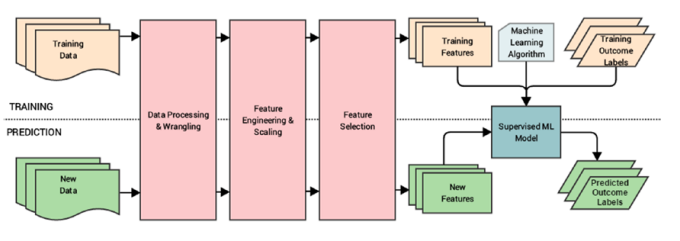

In [66]:
from IPython.display import Image

# Ruta de la imagen local o URL
image_path = 'MLB_CH1/ml_pipeline.png'

# Mostrar la imagen
Image(filename=image_path)  